In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})
from sklearn.model_selection import train_test_split
# Neuroimaging
import ants
# PyTorch
import torch
import torchvision

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import ct
import utils

In [5]:
nifti_dir = "/cluster/tufts/hugheslab/datasets/OASIS-3_CT"
labels_df = ct.label_oasis3(nifti_dir)
labels_df = labels_df[labels_df["paths"].apply(lambda paths: all(path != "" for path in paths))]
print(labels_df.shape)
labels_df.head()

(662, 40)


,XNAT_CTSESSIONDATA ID,Subject,Date_x,Age_x,dcmAccessionNumber,dcmPatientId,dcmPatientName,UID,FreeSurfers,PUPs,...,acsparnt,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,paths
7,OAS30001_CT_d2438,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,184.0,NaN,NaN,2699,-261,261,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
21,OAS30001_CT_d3132,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.0,185.0,NaN,NaN,3332,-200,200,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
34,OAS30001_CT_d3746,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,192.0,NaN,NaN,3675,71,71,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
54,OAS30002_CT_d2345,OAS30002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2585,-240,240,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...
59,OAS30003_CT_d2669,OAS30003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2630,39,39,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...


In [11]:
for index, row in labels_df.iterrows():
    image = ants.image_read(row.paths[0]).numpy()
    print(image.shape)

(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512,

(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 111)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 512, 74)
(512, 51

(512, 512, 74)


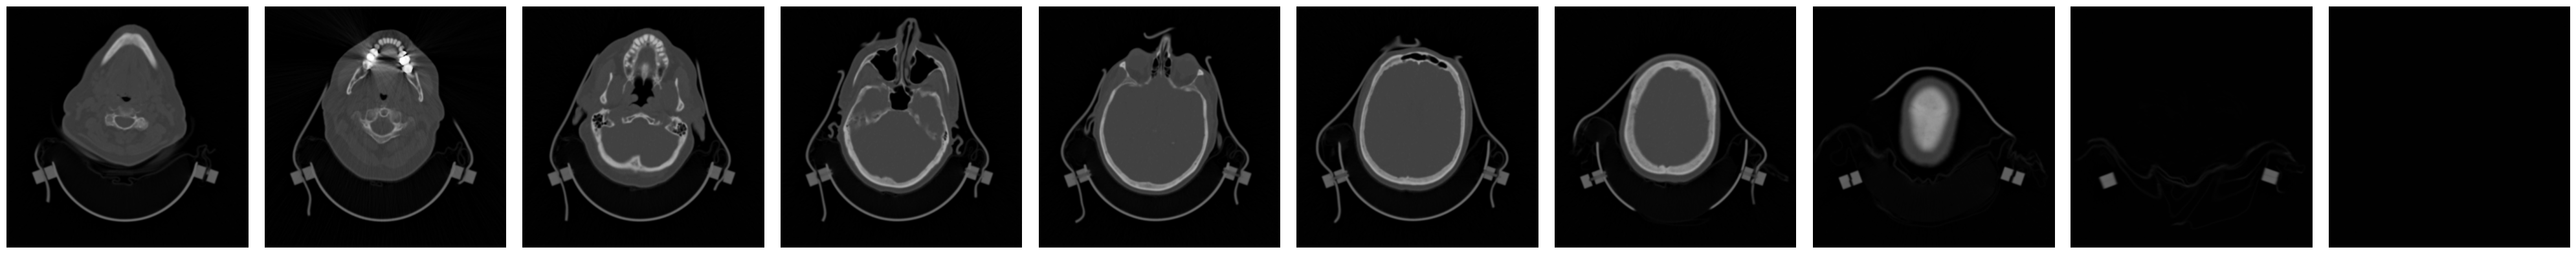

In [4]:
image = ants.image_read(labels_df.iloc[0].paths[0]).numpy()
print(image.shape)
linspace = np.linspace(0, image.shape[-1] - 1, 10).astype(int)

ncols, nrows = 10, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols,4*nrows))

for i, j in enumerate(linspace):
    axs[i].imshow(np.rot90(image[:,:,j], k=1, axes=(-2, -1)), cmap='gray', vmin=np.min(image), vmax=np.max(image))
    axs[i].set_axis_off()
    
fig.tight_layout()
plt.show()

In [5]:
numpy_dir = '/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy'
starts = np.linspace(0, 1620, num=11).astype(int)[:-1]
stops = np.linspace(0, 1620, num=11).astype(int)[1:]
for start, stop in zip(starts, stops):
    print(f'    "python ../src/preprocess_oasis-3_ct.py --nifti_dir=\'{nifti_dir}\' --numpy_dir=\'{numpy_dir}\' --start={start} --stop={stop}"')

    "python ../src/preprocess_oasis-3_ct.py --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy' --start=0 --stop=162"
    "python ../src/preprocess_oasis-3_ct.py --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy' --start=162 --stop=324"
    "python ../src/preprocess_oasis-3_ct.py --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy' --start=324 --stop=486"
    "python ../src/preprocess_oasis-3_ct.py --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy' --start=486 --stop=648"
    "python ../src/preprocess_oasis-3_ct.py --nifti_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT' --numpy_dir='/cluster/tufts/hugheslab/datasets/OASIS-3_CT_numpy' --start=648 --stop=810"
    "python ../src/preprocess_oasis-3_ct.p

In [6]:
labels_df['path'] = labels_df["XNAT_CTSESSIONDATA ID"].apply(lambda ct_id: f"{numpy_dir}/{ct_id}.npz")
#labels_df.to_csv(f'{numpy_dir}/labels.csv', index=False)
labels_df.head()

,XNAT_CTSESSIONDATA ID,Subject,Date_x,Age_x,dcmAccessionNumber,dcmPatientId,dcmPatientName,UID,FreeSurfers,PUPs,...,height,weight,primStudy,acsStudy,diagnosis_day,diff,abs_diff,Alzheimer's,paths,path
7,OAS30001_CT_d2438,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,184.0,NaN,NaN,2699,-261,261,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...,/cluster/tufts/hugheslab/datasets/OASIS-3_CT_n...
21,OAS30001_CT_d3132,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,185.0,NaN,NaN,3332,-200,200,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...,/cluster/tufts/hugheslab/datasets/OASIS-3_CT_n...
34,OAS30001_CT_d3746,OAS30001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,192.0,NaN,NaN,3675,71,71,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...,/cluster/tufts/hugheslab/datasets/OASIS-3_CT_n...
54,OAS30002_CT_d2345,OAS30002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2585,-240,240,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...,/cluster/tufts/hugheslab/datasets/OASIS-3_CT_n...
59,OAS30003_CT_d2669,OAS30003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2630,39,39,0,[/cluster/tufts/hugheslab/datasets/OASIS-3_CT/...,/cluster/tufts/hugheslab/datasets/OASIS-3_CT_n...


In [13]:
################################################################################
def print_job(
    alpha, beta, criterion, dataset_dir, epochs, embedding_level, 
    experiments_dir, instance_conv, kernel_size, lr, pooling, save, seed, 
    use_pos_embedding, weight_decay
):
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_criterion={criterion}_kernel_size={kernel_size}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f'{experiments_dir}/{model_name}.csv'):
        temp_df = pd.read_csv(f'{experiments_dir}/{model_name}.csv')
        if temp_df.shape[0] == epochs:
            return
    
    command = (
        f"python ../src/oasis-3.py "
        f"--alpha={alpha} "
        #f"--beta={beta} "
        f"--batch_size={batch_size} "
        f"--criterion='{criterion}' "
        f"--dataset_dir='{dataset_dir}' "
        f"--epochs={epochs} "
        f"{'--embedding_level ' if embedding_level else ''}"
        f"--experiments_dir='{experiments_dir}' "
        f"{'--instance_conv ' if instance_conv else ''}"
        #f"--kernel_size={kernel_size} "
        f"--lr={lr} "
        f"--model_name='{model_name}' "
        f"--pooling='{pooling}' "
        f"{'--save ' if save else ''}"
        f"--seed={seed} "
        f"{'--use_pos_embedding ' if use_pos_embedding else ''}"
        f"--weight_decay={weight_decay}"
    )
    
    print(f'    "{command}"')

In [20]:
N_train = 10_000
batch_size = 64
steps_per_epoch = int(N_train / batch_size)
epochs = int(100_000 / steps_per_epoch)
print(steps_per_epoch * epochs)
print(epochs)

99996
641


In [14]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
beta = 0.0
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
dataset_dir = "/cluster/tufts/hugheslab/eharve06/encoded_OASIS-3_MRI/ViT_B_16" 
epochs = 1000
embedding_level = True
experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/test" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_MRI_instance_conv=True_instance_level=True" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT_instance_conv=True_instance_level=True" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT_instance_conv2=True_instance_level=True" 
instance_conv = False
kernel_sizes = [3, 7, 11]
lrs = [0.1, 0.01, 0.001, 0.0001]
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["transformer"]
save = False
seeds = [1001, 2001, 3001]
use_pos_embedding = False
weight_decay = 0.0

for alpha, criterion, kernel_size, lr, pooling, seed in itertools.product(alphas, criterions, kernel_sizes, lrs, poolings, seeds):
#for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    temp_dataset_dir = f"{dataset_dir}/seed={seed}"

    print_job(alpha, beta, criterion, temp_dataset_dir, epochs, embedding_level, 
              experiments_dir, instance_conv, kernel_size, lr, pooling, save, seed, 
              use_pos_embedding, weight_decay)

    "python ../src/oasis-3.py --alpha=1.0 --batch_size=64 --criterion='L1' --dataset_dir='/cluster/tufts/hugheslab/eharve06/encoded_OASIS-3_MRI/ViT_B_16/seed=1001' --epochs=1000 --embedding_level --experiments_dir='/cluster/tufts/hugheslab/eharve06/pooling/experiments/test' --lr=0.1 --model_name='alpha=1.0_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False' --pooling='transformer' --seed=1001 --weight_decay=0.0"
    "python ../src/oasis-3.py --alpha=1.0 --batch_size=64 --criterion='L1' --dataset_dir='/cluster/tufts/hugheslab/eharve06/encoded_OASIS-3_MRI/ViT_B_16/seed=2001' --epochs=1000 --embedding_level --experiments_dir='/cluster/tufts/hugheslab/eharve06/pooling/experiments/test' --lr=0.1 --model_name='alpha=1.0_criterion=L1_lr=0.1_pooling=transformer_seed=2001_use_pos_embedding=False' --pooling='transformer' --seed=2001 --weight_decay=0.0"
    "python ../src/oasis-3.py --alpha=1.0 --batch_size=64 --criterion='L1' --dataset_dir='/cluster/tufts/hugheslab/eharve0

In [7]:
# Varying delta
alphas = [1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 0.0]
beta = 0.0
batch_size = 64
#criterions = ["L1", "L2"]
criterions = ["L1"]
dataset_dir = "/cluster/tufts/hugheslab/eharve06/encoded_OASIS-3_CT/ViT_B_16" 
epochs = 1000
embedding_level = False
experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT_instance_level=True" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT_instance_conv=True_instance_level=True" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_MRI" 
#experiments_dir = "/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_MRI_instance_level=True" 
instance_conv = False
kernel_sizes = [3, 7, 11]
lrs = [0.01, 0.001, 0.0001]
poolings = ["max", "mean", "attention", "transformer"]
poolings = ["transformer"]
#poolings = ["attention"]
save = False
seeds = [1001, 2001, 3001]
use_pos_embedding = False
weight_decay = 0.0

columns = ["model_name", "seed", "test_acc", "test_auroc", "test_auprc", "test_loss", "test_nll", "train_acc", "train_auroc", "train_auprc", "train_loss", "train_nll", "val_acc", "val_auroc", "val_auprc", "val_loss", "val_nll"]
df = pd.DataFrame(columns=columns)

for alpha, criterion, lr, pooling, seed in itertools.product(alphas, criterions, lrs, poolings, seeds):
#for alpha, criterion, kernel_size, lr, pooling, seed in itertools.product(alphas, criterions, kernel_sizes, lrs, poolings, seeds):
#for alpha, beta, criterion, delta, lr, pooling, seed in itertools.product(alphas, betas, criterions, deltas, lrs, poolings, seeds):
    
    temp_dataset_dir = f"{dataset_dir}/seed={seed}" 
    model_name = f"alpha={alpha}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_criterion={criterion}_kernel_size={kernel_size}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    #model_name = f"alpha={alpha}_beta={beta}_criterion={criterion}_lr={lr}_pooling={pooling}_seed={seed}_use_pos_embedding={use_pos_embedding}"
    
    if os.path.exists(f"{experiments_dir}/{model_name}.csv"):
        temp_df = pd.read_csv(f"{experiments_dir}/{model_name}.csv")
        if len(temp_df[temp_df.train_auroc > temp_df.val_auroc]):
            index = temp_df[temp_df.train_auroc > temp_df.val_auroc].val_auroc.idxmax()
            row = [model_name, seed, temp_df.test_acc.values[index], temp_df.test_auroc.values[index], temp_df.test_auprc.values[index], temp_df.test_loss.values[index], temp_df.test_nll.values[index], temp_df.train_acc.values[index], temp_df.train_auroc.values[index], temp_df.train_auprc.values[index], temp_df.train_loss.values[index], temp_df.train_nll.values[index], temp_df.val_acc.values[index], temp_df.val_auroc.values[index], temp_df.val_auprc.values[index], temp_df.val_loss.values[index], temp_df.val_nll.values[index]]
            df.loc[len(df)] = row
        
indices = df.groupby(["seed"])["val_auroc"].idxmax()
df = df.loc[indices].reset_index(drop=True)

df.head()

,model_name,seed,test_acc,test_auroc,test_auprc,test_loss,test_nll,train_acc,train_auroc,train_auprc,train_loss,train_nll,val_acc,val_auroc,val_auprc,val_loss,val_nll
0,alpha=0.0001_criterion=L1_lr=0.01_pooling=tran...,1001,0.808000,0.696931,0.307460,5.634894,0.565192,0.867188,0.852284,0.584170,5.393123,0.321937,0.851852,0.754755,0.435734,5.492873,0.423172
1,alpha=0.0001_criterion=L1_lr=0.01_pooling=tran...,2001,0.830189,0.589646,0.229332,5.639725,0.467703,0.854167,0.766780,0.381626,5.544195,0.369749,0.842105,0.670710,0.274115,5.576033,0.404011
2,alpha=1e-05_criterion=L1_lr=0.01_pooling=trans...,3001,0.796296,0.750410,0.344912,0.968755,0.445899,0.851562,0.750362,0.398310,0.892426,0.369542,0.823009,0.744624,0.447797,0.939640,0.416784


In [8]:
df.model_name.values

array(['alpha=0.0001_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False',
       'alpha=0.0001_criterion=L1_lr=0.01_pooling=transformer_seed=2001_use_pos_embedding=False',
       'alpha=1e-05_criterion=L1_lr=0.01_pooling=transformer_seed=3001_use_pos_embedding=False'],
      dtype=object)

In [44]:
print(df.test_auroc.mean(), df.test_auroc.std())

0.6477257410685221 0.024696821061677664


python ../src/oasis-3.py --alpha=0.0001 --batch_size=64 --criterion='L1' --dataset_dir='/cluster/tufts/hugheslab/eharve06/encoded_OASIS-3_CT/ViT_B_16/seed=1001' --epochs=1000 --embedding_level --experiments_dir='/cluster/tufts/hugheslab/eharve06/pooling/experiments/test' --lr=0.1 --model_name='alpha=0.0001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False' --pooling='transformer' --seed=1001 --weight_decay=0.0

In [57]:
# Instance-Level CT
# Max 0.653 0.027
# Mean 0.705 0.090
# ABMIL 0.687 0.108

# Instance-Level MRI
# Max 0.759 0.024
# Mean 0.809 0.029
# ABMIL 0.807 0.023

# Embedding-Level CT
# Max 0.619 0.084
# Mean 0.703 0.088
# ABMIL 0.628 0.105
# TransMIL 0.690 0.064

# Embedding-Level MRI
# Max 0.802 0.024
# Mean 0.801 0.035
# ABMIL 0.779 0.011
# TransMIL 0.748 0.042

0.6969309449195862
0.5664961338043213


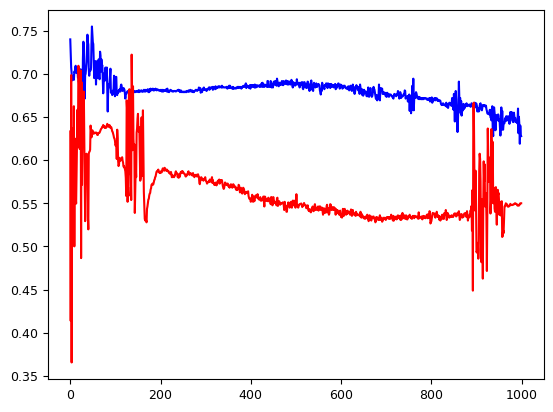

In [98]:
temp_df = pd.read_csv("/cluster/tufts/hugheslab/eharve06/pooling/experiments/OASIS-3_CT/alpha=0.0001_criterion=L1_lr=0.01_pooling=transformer_seed=1001_use_pos_embedding=False.csv")
#plt.plot(temp_df.epoch, temp_df.train_auroc, color="blue")
plt.plot(temp_df.epoch, temp_df.val_auroc, color="blue")
index = temp_df[temp_df.train_auroc > temp_df.val_auroc].val_auroc.idxmax()
print(temp_df.test_auroc[index])
temp_df = pd.read_csv("/cluster/tufts/hugheslab/eharve06/pooling/experiments/test/alpha=0.0001_criterion=L1_lr=0.1_pooling=transformer_seed=1001_use_pos_embedding=False.csv")
#plt.plot(temp_df.epoch, temp_df.train_auroc, color="red")
plt.plot(temp_df.epoch, temp_df.val_auroc, color="red")
index = temp_df[temp_df.train_auroc > temp_df.val_auroc].val_auroc.idxmax()
print(temp_df.test_auroc[index])
plt.show()